In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
data = pd.read_csv('dados/mt_cars.csv')

In [3]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
data.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
s = setup(data, target='mpg')

,Description,Value
0,Session id,4616
1,Target,mpg
2,Target type,Regression
3,Original data shape,"(32, 11)"
4,Transformed data shape,"(32, 11)"
5,Transformed train set shape,"(22, 11)"
6,Transformed test set shape,"(10, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [8]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.7767,6.3822,2.1405,0.0016,0.0958,0.0872,0.0550
ada,AdaBoost Regressor,2.2683,10.2208,2.6682,-0.2684,0.1191,0.1066,0.0300
gbr,Gradient Boosting Regressor,2.1680,8.7048,2.4565,-0.5632,0.1138,0.1067,0.0240
rf,Random Forest Regressor,2.3888,9.2459,2.6746,-0.6571,0.1316,0.1293,0.0680
ridge,Ridge Regression,2.5934,9.9521,2.8494,-0.9708,0.1347,0.1344,0.0100
br,Bayesian Ridge,2.6510,10.8910,3.0234,-1.1560,0.1439,0.1364,0.0100
omp,Orthogonal Matching Pursuit,2.6289,10.9680,2.9659,-1.1585,0.1401,0.1316,0.0110
en,Elastic Net,2.5965,10.8925,2.9703,-1.3030,0.1383,0.1305,0.0110
lasso,Lasso Regression,2.6411,11.1295,3.0406,-1.3283,0.1431,0.1341,0.0100
llar,Lasso Least Angle Regression,2.6411,11.1294,3.0405,-1.3283,0.1431,0.1341,0.0110


## Métricas usadas para avaliar um modelo:
* **MAE** - Mean Absolute Error - Erro Médio Absoluto:
  * Média das diferenças absolutas entre as previsões do modelo e os valores reais.
  * Quanto menor, melhor.
* **MSE** - Mean Squared Error - Erro Quadrático Médio:
  * Média dos quadrados dos erros, entre as previsões do modelo e os valores reais.
  * Quanto menor, melhor.
* **RMSE** -  Root of the Mean of the Square of Errors - Erro Quadrático Médio:
  * Raiz quadrada do **MSE**
  * Assim como o **MAE** mede a diferença entre as previsões do modelo e os valores reais, porém, leva em consideração o quadrado dos erros, atribuindo mais peso aos erros maiores.
  * Quanto menor, melhor
* **R2** - Coefficient of Determination - Coeficiente de Determinação:
  * Mostra o quanto os dados se ajustam a linha de regressão.
  * Varia entre 0 ~ 1.
  * Sempre não negativo.
  * Quanto maior, mais explicativo ele é, logo melhor.
* **RMSLE** - Root Mean Squared Logarithmic Error - Erro Quadrático Logaritmico Médio:
  * Diferente do **RMSE** ele calcula a diferença entre o logaritmo dos valores previstos e reais.
  * Útil se os dados variam muito.
  * Dá menos peso a grandes erros.
  * Quanto menor melhor.
* **MAPE** - Mean Absolute Percentage Error - Erro Percentual Médio Absoluto:
  * Calcula o erro absoluto como uma porcentagem do valor real.
  * Quanto menor, melhor.
***

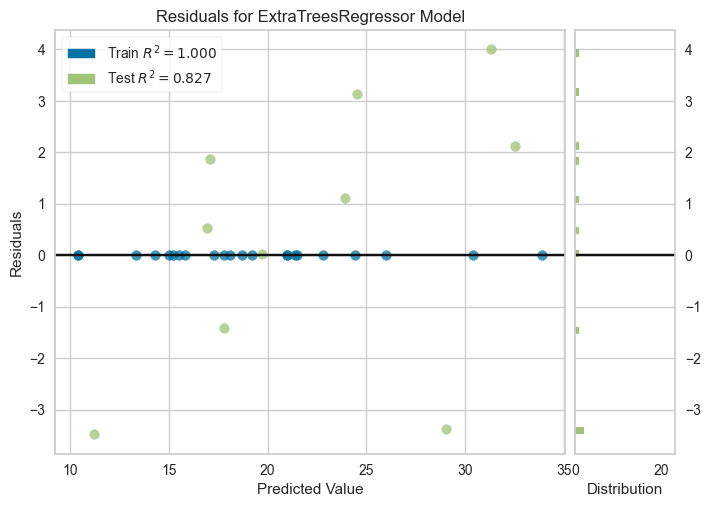

In [9]:
plot_model(best, plot='residuals')

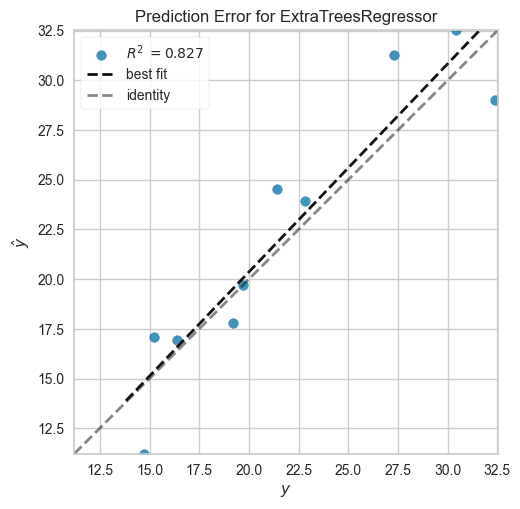

In [10]:
plot_model(best, plot='error')

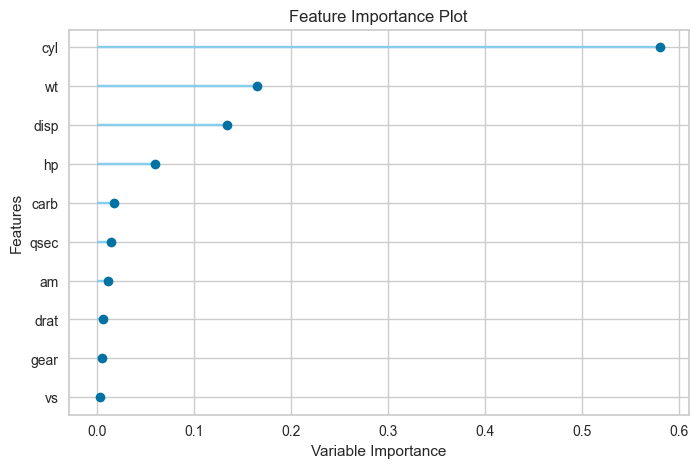

In [11]:
plot_model(best, plot='feature')

In [12]:
previsoes = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.1098,6.0984,2.4695,0.8267,0.1156,0.0984


In [13]:
previsoes.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg,prediction_label
13,8,275.799988,180,3.07,3.780,18.000000,0,0,3,3,15.200000,17.071999
18,4,75.699997,52,4.93,1.615,18.520000,1,1,4,2,30.400000,32.525001
9,6,167.600006,123,3.92,3.440,18.299999,1,0,4,4,19.200001,17.779999
25,4,79.000000,66,4.08,1.935,18.900000,1,1,4,1,27.299999,31.299001
16,8,440.000000,230,3.23,5.345,17.420000,0,0,3,4,14.700000,11.215000


In [14]:
previsoes.shape

(10, 12)

In [15]:
previsoes.reset_index(inplace=True, drop=True)

In [16]:
previsoes.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg,prediction_label
0,8,275.799988,180,3.07,3.780,18.000000,0,0,3,3,15.200000,17.071999
1,4,75.699997,52,4.93,1.615,18.520000,1,1,4,2,30.400000,32.525001
2,6,167.600006,123,3.92,3.440,18.299999,1,0,4,4,19.200001,17.779999
3,4,79.000000,66,4.08,1.935,18.900000,1,1,4,1,27.299999,31.299001
4,8,440.000000,230,3.23,5.345,17.420000,0,0,3,4,14.700000,11.215000


In [17]:
previsoes.tail()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg,prediction_label
5,4,121.000000,109,4.11,2.78,18.600000,1,1,4,2,21.400000,24.535000
6,6,145.000000,175,3.62,2.77,15.500000,0,1,5,6,19.700001,19.725000
7,4,78.699997,66,4.08,2.20,19.469999,1,1,4,1,32.400002,29.017000
8,4,140.800003,95,3.92,3.15,22.900000,1,0,4,2,22.799999,23.918000
9,8,275.799988,180,3.07,4.07,17.400000,0,0,3,3,16.400000,16.935999
